In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

import functions_IDT

colors = sns.color_palette("colorblind") 
green_sns = colors[2]
red_sns = colors[3]
brown_sns = colors[5]
gray_sns = colors[7] 

# Visual evolution of point clouds in dimension $d=2$ 

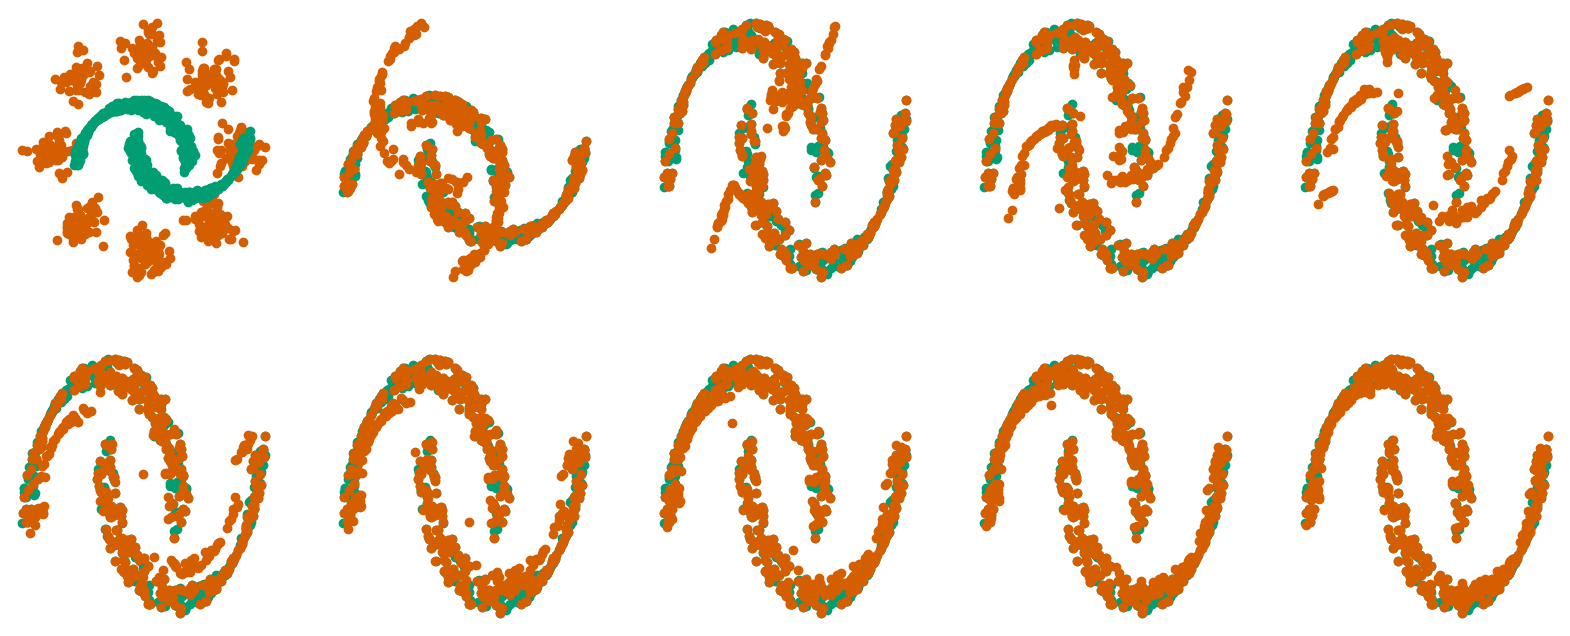

In [2]:
def IDT_with_plots(x0,x1,NB_IDT,Nrows,Nplot,seed=None):
    """
    Computes IDT between datasets x0 and x1 along with 'NB_IDT' iterations. 
    Show IDT iterates as 'Nplot' plots for 'Nrows' rows. 
    Careful to impose: NB_IDT = Nrows * Nplot
    'seed': allows to fix the choice of the orthonormal basis along the iterations. 
    """
    alpha = 0.51 
    t = (1/np.linspace(1,NB_IDT,NB_IDT))**alpha
    if seed==None:
        seed = np.random.randint(0,100)

    xt = functions_IDT.IDT(x0,x1,K=NB_IDT,seed=seed)

    fig, ax = plt.subplots(Nrows, Nplot, figsize=(Nplot*4, Nrows*4))
    for j in range(Nrows):
        for i in range(Nplot):
            k = j * Nplot + i
            if (i==0)&(j==0):
                    ax[j,i].scatter(x0[:,0],x0[:,1],color=red_sns)
                    ax[j,i].scatter(x1[:,0],x1[:,1],color=green_sns)
                    ax[j,i].axis("off")
            else:
                ax[j,i].scatter(x1[:,0],x1[:,1],color=green_sns)
                ax[j,i].scatter(xt[k][:,0],xt[k][:,1],color=red_sns)
                ax[j,i].axis("off")
    plt.show()
    return(xt)

x0 = functions_IDT.sample_8gaussians(500)
x1 = functions_IDT.sample_moons(500)

xt = IDT_with_plots(x0,x1,NB_IDT=10,Nrows=2,Nplot=5)

# IDT between continuous distributions 

The next cell is a simple illustration 

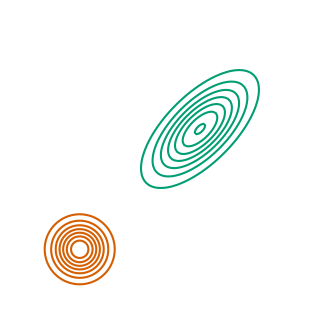

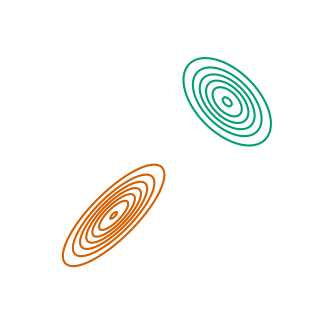

In [3]:
from scipy.stats import multivariate_normal
def plot_gaussian_contours(mean, cov, n_points=100, levels=None,color= "black"):
    x = np.linspace(mean[0] - 4*np.sqrt(cov[0,0]), mean[0] + 4*np.sqrt(cov[0,0]), n_points)
    y = np.linspace(mean[1] - 4*np.sqrt(cov[1,1]), mean[1] + 4*np.sqrt(cov[1,1]), n_points)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)

    CS = plt.contour(X, Y, Z, levels=levels, colors= color)
    return(Z)

d = 2
cov0 = np.eye(d)
cov1 = np.array([[3,2],[2,3]])
plt.figure(figsize=(4,4))  
plot_gaussian_contours(np.zeros(d), cov0, color = sns.color_palette("colorblind").as_hex()[3]) 
plot_gaussian_contours(np.ones(d)*7, cov1, color = sns.color_palette("colorblind").as_hex()[2]) 
plt.axis("equal")
plt.grid(True)
plt.axis("off")
plt.savefig("FiguresIDT/Viz_BetweenGaussiansContinuous.pdf",bbox_inches='tight')


cov0 = np.array([[2.5,2],[2,2.5]])
cov1 = np.array([[2,-1],[-1,2]])
plt.figure(figsize=(4,4))  
plot_gaussian_contours(np.zeros(d), cov0, color = sns.color_palette("colorblind").as_hex()[3]) 
plot_gaussian_contours(np.ones(d)*7, cov1, color = sns.color_palette("colorblind").as_hex()[2]) 
plt.axis("equal")
plt.grid(True)
plt.axis("off")
plt.savefig("FiguresIDT/Viz_BetweenGaussiansContinuous2.pdf",bbox_inches='tight')

# IDT between continuous Gaussians: Isotropic target 

/Users/glthurin/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/glthurin/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/glthurin/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/glthurin/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


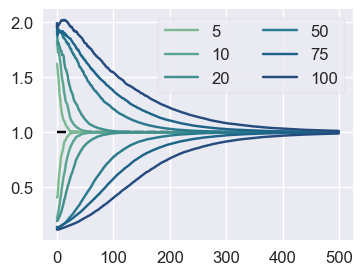

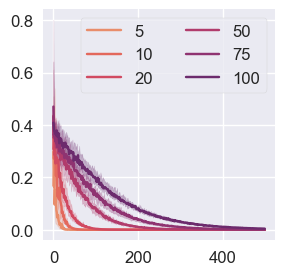

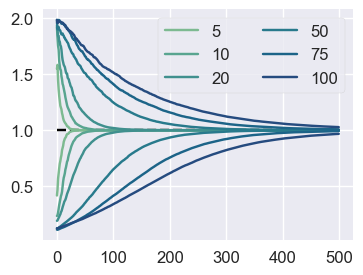

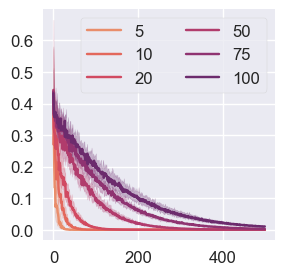

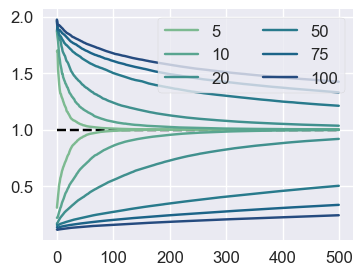

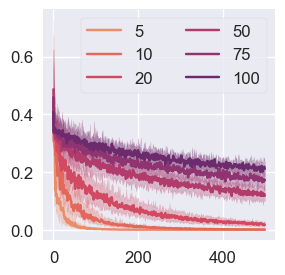

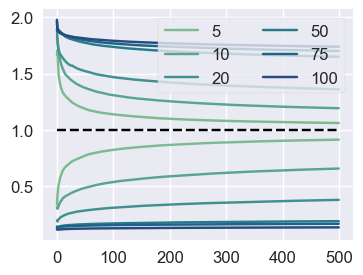

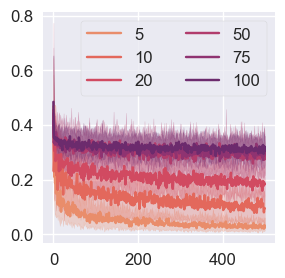

In [4]:
list_dim = [5,10,20,50,75,100] 
list_alpha = [0,0.1,0.51,0.9]
K = 500
Nrep = 10
seed = 1

for alpha in list_alpha:
    # 1) Compute IDT and gather results 
    list_medians,list_q1,list_q3 = [] ,[],[] 
    list_res_mineig,list_res_maxeig = [], []
    for dim in list_dim:
        cov1 = np.eye(dim) 
        NameDataset = "TargetN01" # to save results accordingly 
        # Repeat IDT 
        list_rep_SW , list_rep_eig_min, list_rep_eig_max = functions_IDT.rep_IDT(Nrep,dim,K,alpha,seed,cov1)
        # Quartiles of SW along iterations
        list_medians.append(np.median(list_rep_SW, axis=0) )
        list_q1.append(np.percentile(list_rep_SW, 5, axis=0) )
        list_q3.append(np.percentile(list_rep_SW, 95, axis=0) )
        # Min/Max eigenvalue along iterations  
        list_res_mineig.append( np.mean(list_rep_eig_min,axis=0))
        list_res_maxeig.append( np.mean(list_rep_eig_max,axis=0))

    # 2) Plot of Min/Max eigenvalues 
    plt.figure(figsize=(4,3))
    plt.style.use('seaborn-v0_8')
    colors2 = sns.color_palette("crest")
    c = 0 
    k_values = np.arange(list_medians[0].shape[0])  
    plt.hlines(1,xmin=0,xmax=list_medians[0].shape[0]-1,linestyles="dashed",color="black")
    for dim in list_dim:
        plt.plot(k_values, list_res_mineig[c], color=colors2[c], label='{}'.format(dim))
        plt.plot(k_values, list_res_maxeig[c], color=colors2[c])
        c += 1 
    plt.grid(True) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc = "upper right",ncol=2,frameon=True,fontsize=12) 
    plt.savefig("FiguresIDT/curve_eig_alpha{}.pdf".format(alpha),bbox_inches='tight')

    # 3) Plot of SW distance 
    functions_IDT.plot_SW_IDT(list_medians,list_q1,list_q3,list_dim,alpha,NameDataset)


### The next cell reproduces the same experiments but with an alternative algorithm using a single direction $\theta$ at each iteration 

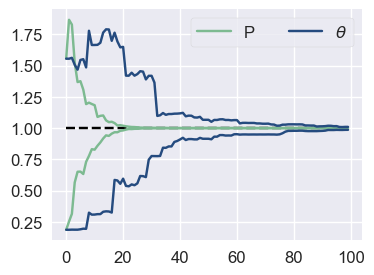

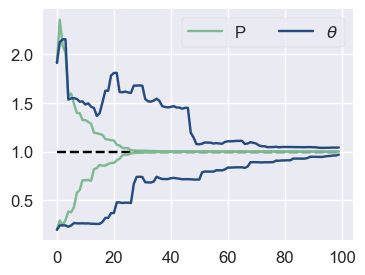

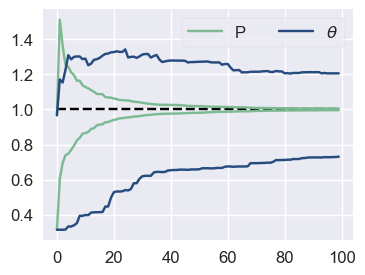

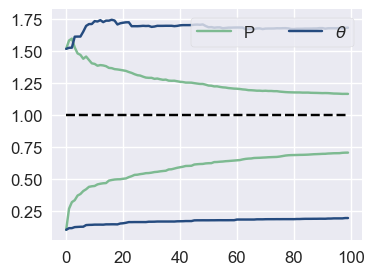

In [15]:
dim = 5 
K = 100
Nrep = 1
seed = 1
list_alpha = [0,0.1,0.51,0.9] 

for alpha in list_alpha:
    # 1) Compute IDT and gather results 
    cov1 = np.eye(dim) 
    list_rep_eig_min, list_rep_eig_max, list_rep_eig_min_tht, list_rep_eig_max_tht = functions_IDT.rep_IDT_BothAlgos(Nrep,dim,K,alpha,seed,cov1)

    # 2) Plot of Min/Max eigenvalues 
    plt.figure(figsize=(4,3))
    plt.style.use('seaborn-v0_8')
    colors2 = sns.color_palette("crest")
    k_values = np.arange(K)  
    plt.hlines(1,xmin=0,xmax=K-1,linestyles="dashed",color="black")
    plt.plot(k_values, np.mean(list_rep_eig_min,axis=0), color=colors2[0], label='{}'.format("P"))
    plt.plot(k_values, np.mean(list_rep_eig_max,axis=0), color=colors2[0])
    
    plt.plot(k_values, np.mean(list_rep_eig_min_tht,axis=0), color=colors2[5], label='{}'.format(r"$\theta$"))
    plt.plot(k_values, np.mean(list_rep_eig_max_tht,axis=0), color=colors2[5])
    plt.grid(True) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc = "upper right",ncol=2,frameon=True,fontsize=12) 
    plt.savefig("FiguresIDT/curve_eig_COMPAR_alpha{}.pdf".format(alpha),bbox_inches='tight')


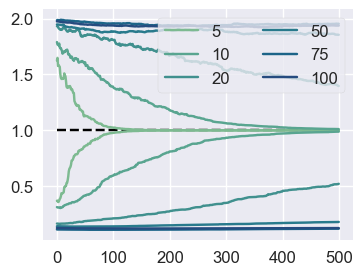

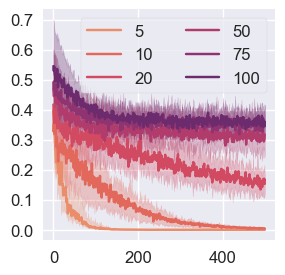

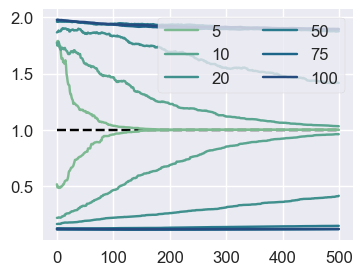

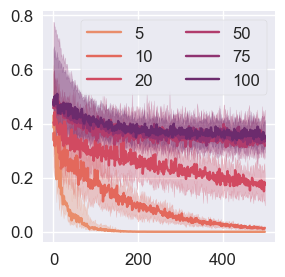

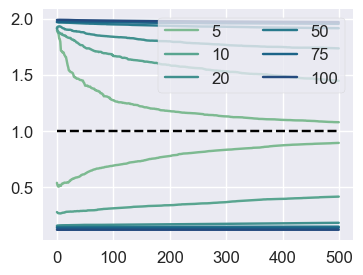

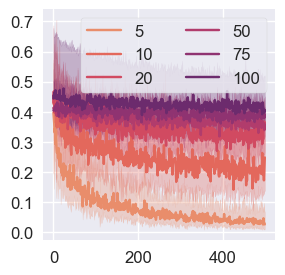

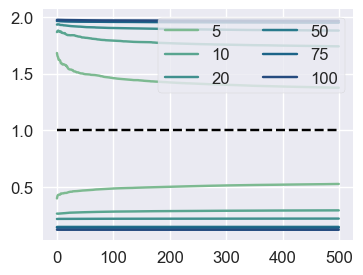

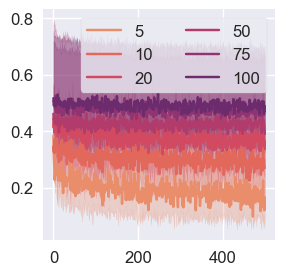

In [5]:
list_dim = [5,10,20,50,75,100] 
list_alpha = [0,0.1,0.51,0.9] 
K = 500
Nrep = 10
seed = 1

for alpha in list_alpha:
    # 1) Compute IDT and gather results 
    list_medians,list_q1,list_q3 = [] ,[],[] 
    list_res_mineig,list_res_maxeig = [], []
    for dim in list_dim:
        cov1 = np.eye(dim) 
        NameDataset = "TargetN01_ONEDIR" # to save results accordingly 
        # Repeat IDT 
        list_rep_SW , list_rep_eig_min, list_rep_eig_max = functions_IDT.rep_IDT_singleTheta(Nrep,dim,K,alpha,seed,cov1)
        # Quartiles of SW along iterations
        list_medians.append(np.median(list_rep_SW, axis=0) )
        list_q1.append(np.percentile(list_rep_SW, 5, axis=0) )
        list_q3.append(np.percentile(list_rep_SW, 95, axis=0) )
        # Min/Max eigenvalue along iterations  
        list_res_mineig.append( np.mean(list_rep_eig_min,axis=0))
        list_res_maxeig.append( np.mean(list_rep_eig_max,axis=0))

    # 2) Plot of Min/Max eigenvalues 
    plt.figure(figsize=(4,3))
    plt.style.use('seaborn-v0_8')
    colors2 = sns.color_palette("crest")
    c = 0 
    k_values = np.arange(list_medians[0].shape[0])  
    plt.hlines(1,xmin=0,xmax=list_medians[0].shape[0]-1,linestyles="dashed",color="black")
    for dim in list_dim:
        plt.plot(k_values, list_res_mineig[c], color=colors2[c], label='{}'.format(dim))
        plt.plot(k_values, list_res_maxeig[c], color=colors2[c])
        c += 1 
    plt.grid(True) 
    plt.legend(loc = "upper right",ncol=2,frameon=True,fontsize=12) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig("FiguresIDT/curve_eig_ONEDIR_alpha{}.pdf".format(alpha),bbox_inches='tight')

    # 3) Plot of SW distance 
    functions_IDT.plot_SW_IDT(list_medians,list_q1,list_q3,list_dim,alpha,NameDataset)


# IDT between continuous Gaussians: Non-isotropic target 

For the non-isotropic target, we do not report min/max eigenvalues, to focus on convergence in term of Sliced-Wasserstein distance. 

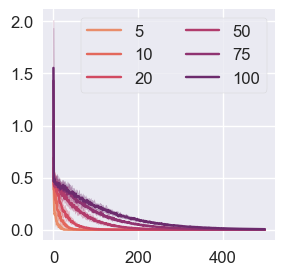

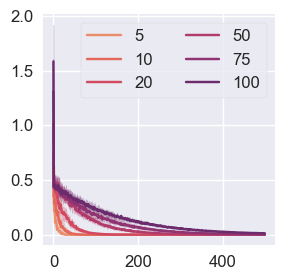

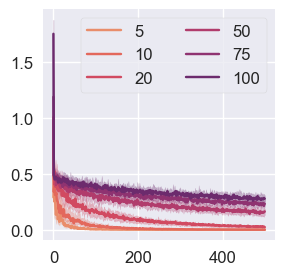

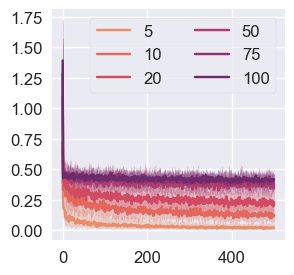

In [6]:
list_dim = [5,10,20,50,75,100] 
list_alpha = [0,0.1,0.51,0.9]
K = 500
Nrep = 10
seed = 1

for alpha in list_alpha:
    # 1) Compute IDT and gather results 
    list_medians,list_q1,list_q3 = [] ,[],[] 
    list_res_mineig,list_res_maxeig = [], []
    for dim in list_dim:
        cov1 = np.diag( np.abs(np.random.normal(4,1,size=dim) ) )/3
        NameDataset = "TargetNonIsotropic" # to save results accordingly 
        # Repeat IDT 
        list_rep_SW , list_rep_eig_min, list_rep_eig_max = functions_IDT.rep_IDT(Nrep,dim,K,alpha,seed,cov1)
        # Quartiles of SW along iterations
        list_medians.append(np.median(list_rep_SW, axis=0) )
        list_q1.append(np.percentile(list_rep_SW, 5, axis=0) )
        list_q3.append(np.percentile(list_rep_SW, 95, axis=0) )

    # 2) Plot of SW distance 
    functions_IDT.plot_SW_IDT(list_medians,list_q1,list_q3,list_dim,alpha,NameDataset)


# IDT between discrete measures: 

The next cell is a simple illustration

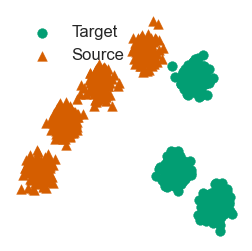

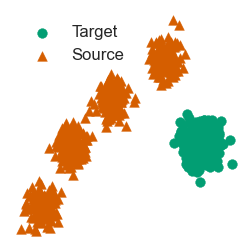

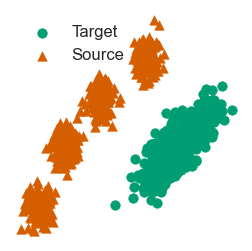

In [7]:
d = 2
n = 500
x0 = functions_IDT.sample_blobs(n=n,dim=d,centers=4,random_state=3) - np.array([12,0])

target = "Blob"
x1 = functions_IDT.sample_blobs(n=n,dim=d,centers=3,random_state=10) 
plt.figure(figsize=(3,3))
plt.scatter(x1[:,0],x1[:,1],color=green_sns,label="Target")
plt.scatter(x0[:,0],x0[:,1],marker="^",color=red_sns,label="Source")
plt.axis("off")
plt.legend(loc = "upper left",fontsize=12)
plt.savefig("FiguresIDT/Viz_Target{}.pdf".format(target),bbox_inches='tight')

target="StandardGaussian"
x1 = np.random.multivariate_normal(np.zeros(d),np.eye(d),size=500)
plt.figure(figsize=(3,3))
plt.scatter(x1[:,0],x1[:,1],color=green_sns,label="Target")
plt.scatter(x0[:,0],x0[:,1],marker="^",color=red_sns,label="Source")
plt.axis("off")
plt.legend(loc = "upper left",fontsize=12)
plt.savefig("FiguresIDT/Viz_Target{}.pdf".format(target),bbox_inches='tight')

target="CovGaussian"
A = functions_IDT.random_covariance_mat(d,seed=10) * 3
x1 = np.random.multivariate_normal(np.zeros(d),A @ A.T ,size=500) 
plt.figure(figsize=(3,3))
plt.scatter(x1[:,0],x1[:,1],color=green_sns,label="Target")
plt.scatter(x0[:,0],x0[:,1],marker="^",color=red_sns,label="Source")
plt.legend(loc = "upper left",fontsize=12)
plt.axis("off")
plt.savefig("FiguresIDT/Viz_Target{}.pdf".format(target),bbox_inches='tight')



In [17]:
list_dim = [5,10,20,50,75,100] 
list_alpha = [0,0.1,0.51,0.9]
K = 500
Nrep = 10
seed = 1
n = 500 

5
10
20
50
75
100
0
5
10
20
50
75
100
0.1
5
10
20
50
75
100
0.51
5
10
20
50
75
100
0.9


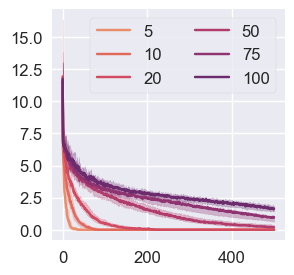

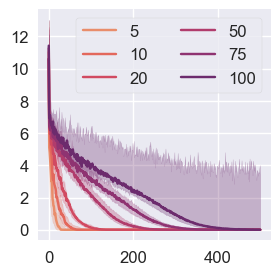

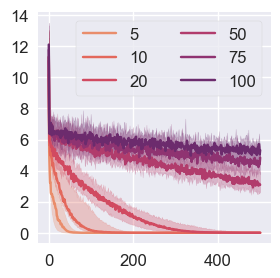

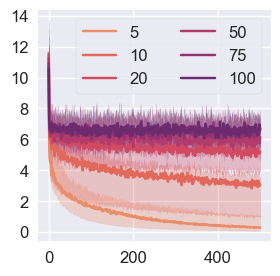

In [18]:
target = None 
NameDataset = "DiscreteBlobs" # for reference when saving figures 

for alpha in list_alpha:
    # 1) Compute IDT and gather results 
    list_medians,list_q1,list_q3 = [] ,[],[] 
    list_res_mineig,list_res_maxeig = [], []
    for dim in list_dim:
        # Repeat IDT 
        median,q1,q3 = functions_IDT.compute_loss_variousdata(n=n,d=dim, K=K,Nrep=Nrep,alpha=alpha,target=target)
        # Quartiles of SW along iterations
        list_medians.append(median )
        list_q1.append(q1 )
        list_q3.append(q3 )
        print(dim)
    print(alpha)

    # 2) Plot of SW distance 
    functions_IDT.plot_SW_IDT(list_medians,list_q1,list_q3,list_dim,alpha,NameDataset)

5
10
20
50
75
100
0
5
10
20
50
75
100
0.1
5
10
20
50
75
100
0.51
5
10
20
50
75
100
0.9


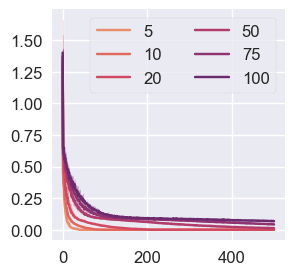

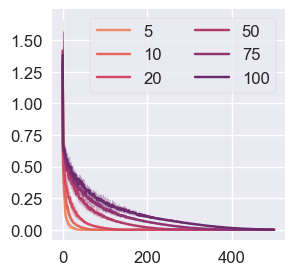

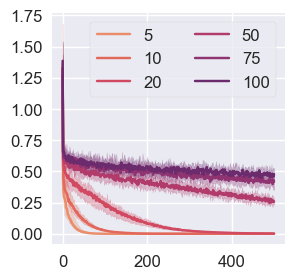

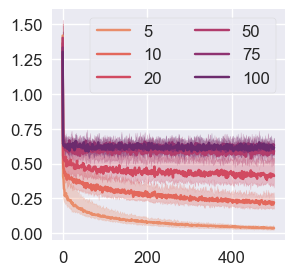

In [12]:
target = "StandardGaussian"
NameDataset = "DiscreteN01" # for reference when saving figures 

for alpha in list_alpha:
    # 1) Compute IDT and gather results 
    list_medians,list_q1,list_q3 = [] ,[],[] 
    list_res_mineig,list_res_maxeig = [], []
    for dim in list_dim:
        # Repeat IDT 
        median,q1,q3 = functions_IDT.compute_loss_variousdata(n=n,d=dim, K=K,Nrep=Nrep,alpha=alpha,target=target)
        # Quartiles of SW along iterations
        list_medians.append(median )
        list_q1.append(q1 )
        list_q3.append(q3 )
        print(dim)
    print(alpha)

    # 2) Plot of SW distance 
    functions_IDT.plot_SW_IDT(list_medians,list_q1,list_q3,list_dim,alpha,NameDataset)

5
10
20
50
75
100
0
5
10
20
50
75
100
0.1
5
10
20
50
75
100
0.51
5
10
20
50
75
100
0.9


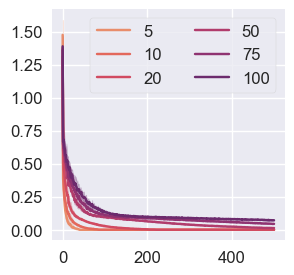

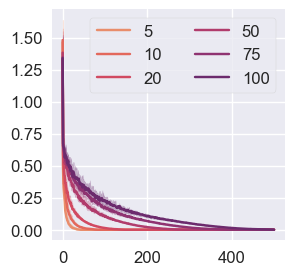

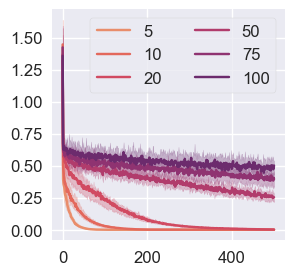

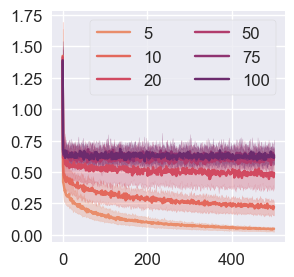

In [13]:
target = "CovGaussian"
NameDataset = "DiscreteNSIGMA" # for reference when saving figures 

for alpha in list_alpha:
    # 1) Compute IDT and gather results 
    list_medians,list_q1,list_q3 = [] ,[],[] 
    list_res_mineig,list_res_maxeig = [], []
    for dim in list_dim:
        # Repeat IDT 
        median,q1,q3 = functions_IDT.compute_loss_variousdata(n=n,d=dim, K=K,Nrep=Nrep,alpha=alpha,target=target)
        # Quartiles of SW along iterations
        list_medians.append(median )
        list_q1.append(q1 )
        list_q3.append(q3 )
        print(dim)
    print(alpha)

    # 2) Plot of SW distance 
    functions_IDT.plot_SW_IDT(list_medians,list_q1,list_q3,list_dim,alpha,NameDataset)